In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import time
import random
import operator
import pickle

In [48]:
df = pd.read_csv('flightlist-november.csv') 

print(df)

        callsign number  icao24 registration typecode origin destination  \
0        TUP6928    NaN  424450          NaN      NaN    NaN        UUWW   
1         CSN399  CZ399  781795          NaN      NaN   YMML        KJFK   
2         ETH714    NaN  040101       ET-ASG     B788   KEWR        ESSA   
3          ZSALT    NaN  008142       ZS-ALT     B190    NaN        YPPH   
4         IRM112  W5112  7335a1       EP-MMA     A343   WMKK        LTBW   
...          ...    ...     ...          ...      ...    ...         ...   
1825010   NKS236  NK236  ac97e1       N910NK      NaN    NaN        KFLL   
1825011    AM333    NaN  7c6a57       VH-VAH     BE20   YMAV        YMEN   
1825012   N404AM    NaN  a4bb89       N404AM     B407    NaN        1IL4   
1825013   N383AK    NaN  a46679       N383AK      NaN   PAMR        PAMR   
1825014   EJA426  1I426  a51358       N426QS     GLF4   KALN        KSUS   

                         firstseen                   lastseen  \
0        2020-10-31 01

In [49]:
dfs = df

In [50]:
dfs = dfs.drop(['number', 'icao24', 'altitude_1', 'altitude_2'], axis=1)

In [51]:
dfs = dfs.dropna(subset=['registration', 'typecode', 'origin', 'destination', 'latitude_2', 'longitude_2'])

In [52]:
dfs = dfs[dfs["callsign"].str[:3]=="SIA"]

In [53]:
dfs.head()

,callsign,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,latitude_2,longitude_2
34,SIA377,9V-SMG,A359,LIMC,WSSS,2020-10-31 12:31:55+00:00,2020-11-01 00:48:28+00:00,2020-11-01 00:00:00+00:00,45.623749,8.735337,1.308929,103.960644
161,SIA26,9V-SMI,A359,WSSS,EDDF,2020-10-31 16:12:38+00:00,2020-11-01 04:36:47+00:00,2020-11-01 00:00:00+00:00,1.395721,103.997048,50.040572,8.549163
167,SIA324,9V-SMT,A359,WSSS,EHAM,2020-10-31 16:16:27+00:00,2020-11-01 04:55:17+00:00,2020-11-01 00:00:00+00:00,1.389542,103.994720,52.357628,4.711487
171,SIA283,9V-SMD,A359,WSSS,NZAA,2020-10-31 16:18:49+00:00,2020-11-01 01:19:01+00:00,2020-11-01 00:00:00+00:00,1.394240,103.996298,-36.991241,174.861496
267,SIA346,9V-SMH,A359,WSSS,LSZH,2020-10-31 17:42:04+00:00,2020-11-01 06:16:57+00:00,2020-11-01 00:00:00+00:00,1.392471,103.996251,47.478653,8.540771


In [54]:
dfs.registration.unique()
# dfs.origin.unique()

array(['9V-SMG', '9V-SMI', '9V-SMT', '9V-SMD', '9V-SMH', '9V-SFN',
       '9V-SMC', '9V-SFM', '9V-SMS', '9V-SFK', '9V-SML', '9V-SWQ',
       '9V-MGL', '9V-SMF', '9V-SFQ', '9V-SWE', '9V-SFI', '9V-SMO',
       '9V-SFP', '9V-SFO', '9V-SMQ', '9V-SMN', '9V-SMJ', '9V-SMM',
       '9V-SMB', '9V-SMP', '9V-SMA', '9V-SWY', '9V-SWR', '9V-SCB',
       '9V-SWP', '9V-SMK', '9V-MGI', '9V-SMR', '9V-SWM', '9V-SWH',
       '9V-SWO', '9V-MGF', '9V-SWS', '9V-SKU', '9V-SME', '9V-SWK',
       '9V-SWN'], dtype=object)

In [55]:
data = {'airport': [],
        'latitude': [],
        'longitude': []}

airports = pd.DataFrame(data)
print(airports)

Empty DataFrame
Columns: [airport, latitude, longitude]
Index: []


In [56]:
airports_data = dfs.origin.unique()
airports_another_data = dfs.destination.unique()

for i in airports_another_data:
    found = False
    for j in airports_data:
        if i == j:
            found = True
    if found == False:
        airports_data = np.append(airports_data, i)

In [57]:
print(airports_data)

['LIMC' 'WSSS' 'OMSJ' 'EGLL' 'YSSY' 'YMML' 'NZAA' 'KORD' 'WBSB' 'VOMM'
 'KDFW' 'EHAM' 'VHHH' 'EDDF' 'FAOR' 'YBBN' 'PANC' 'EBMB' 'WMKK' 'KLAX'
 'LSZH' 'NZCH' 'VOBL' 'ZUCK' 'VABB' 'LFPG' 'EKCH' 'VIDP' 'FARA' 'EBBR'
 'YPPH' 'LEBL' 'WSAC' 'VGZR' 'YSCB' 'RJAK' 'FAGM' 'LTBW' 'YTWB' 'YRED'
 'TS53' 'YPWH' 'RJAA' 'LTBA' 'FABB' 'VGTJ' '6AK5' 'WIDD']


In [58]:
for i in airports_data:
    if (np.isnan(dfs[dfs["origin"]==i]["latitude_1"].median())):
        latitude = dfs[dfs["destination"]==i]["latitude_2"].median()
        longitude = dfs[dfs["destination"]==i]["longitude_2"].median()
        
    elif (np.isnan(dfs[dfs["destination"]==i]["latitude_2"].median())):
        latitude = dfs[dfs["origin"]==i]["latitude_1"].median()
        longitude = dfs[dfs["origin"]==i]["longitude_1"].median()
        
    else:
        latitude = (dfs[dfs["origin"]==i]["latitude_1"].median() + dfs[dfs["destination"]==i]["latitude_2"].median())/2
        longitude = (dfs[dfs["origin"]==i]["longitude_1"].median() + dfs[dfs["destination"]==i]["longitude_2"].median())/2
        
    airport = {'airport': i, 'latitude': latitude, 'longitude': longitude}
    airports = airports.append(airport, ignore_index=True)

print(airports)

   airport   latitude   longitude
0     LIMC  45.622997    8.729880
1     WSSS   1.349354  103.991831
2     OMSJ  25.333187   55.513881
3     EGLL  51.464928   -0.451351
4     YSSY -33.937398  151.173686
5     YMML -37.659397  144.836085
6     NZAA -37.007307  174.802684
7     KORD  41.967407  -87.905482
8     WBSB   4.943314  114.927863
9     VOMM  12.988395   80.164536
10    KDFW  32.904827  -97.050797
11    EHAM  52.329506    4.733640
12    VHHH  22.306459  113.907723
13    EDDF  50.045047    8.569396
14    FAOR -26.110302   28.248013
15    YBBN -27.383320  153.122108
16    PANC  61.179126 -150.017751
17    EBMB  50.909637    4.492666
18    WMKK   2.714566  101.717297
19    KLAX  33.936884 -118.397799
20    LSZH  47.467043    8.551562
21    NZCH -43.486825  172.534596
22    VOBL  13.189594   77.703107
23    ZUCK  29.778076  106.693145
24    VABB  19.088734   72.868544
25    LFPG  48.996591    2.563600
26    EKCH  55.612789   12.641687
27    VIDP  28.559853   77.113512
28    FARA -26

In [59]:
e_asia = ["VOMM", "VHHH", "VOBL", "ZUCK", "VABB", "VIDP", "VGZR", "RJAK", "RJAA", "VGTJ"]
americas = ["KORD", "KDFW", "PANC", "KLAX", "TS53", "6AK5"]
europe = ["LIMC", "EGLL", "EHAM", "EDDF", "EBMB", "LSZH", "LFPG", "EKCH", "FARA", "EBBR", "LEBL"]
sw_pasific = ["WSSS", "YSSY", "YMML", "NZAA", "WBSB", "YBBN", "WMKK", "NZCH", "YPPH", "WSAC", "YSCB", "YTWB", "YRED", "YPWH", "WIDD"]
w_asia_africa = ["OMSJ", "FAOR", "FAGM", "LTBW", "LTBA", "FABB"]

In [60]:
region = []
load_rate = []
for i in range(len(airports)):
    for j in range(len(e_asia)):
        if(airports["airport"].iloc[i]==e_asia[j]):
            region.append("East Asia")
            load_rate.append(0.128)
            break
    for k in range(len(americas)):
        if(airports["airport"].iloc[i]==americas[k]):
            region.append("Americas")
            load_rate.append(0.113)
            break
    for l in range(len(europe)):
        if(airports["airport"].iloc[i]==europe[l]):
            region.append("Europe")
            load_rate.append(0.133)
            break
    for m in range(len(sw_pasific)):
        if(airports["airport"].iloc[i]==sw_pasific[m]):
            region.append("South West Pacific")
            load_rate.append(0.171)
            break
    for n in range(len(w_asia_africa)):
        if(airports["airport"].iloc[i]==w_asia_africa[n]):
            region.append("West Asia and Africa")
            load_rate.append(0.140)
            break
            
print(region)

['Europe', 'South West Pacific', 'West Asia and Africa', 'Europe', 'South West Pacific', 'South West Pacific', 'South West Pacific', 'Americas', 'South West Pacific', 'East Asia', 'Americas', 'Europe', 'East Asia', 'Europe', 'West Asia and Africa', 'South West Pacific', 'Americas', 'Europe', 'South West Pacific', 'Americas', 'Europe', 'South West Pacific', 'East Asia', 'East Asia', 'East Asia', 'Europe', 'Europe', 'East Asia', 'Europe', 'Europe', 'South West Pacific', 'Europe', 'South West Pacific', 'East Asia', 'South West Pacific', 'East Asia', 'West Asia and Africa', 'West Asia and Africa', 'South West Pacific', 'South West Pacific', 'Americas', 'South West Pacific', 'East Asia', 'West Asia and Africa', 'West Asia and Africa', 'East Asia', 'Americas', 'South West Pacific']


In [61]:
airports['region'] = region
airports['load_rate'] = load_rate
print(airports)

   airport   latitude   longitude                region  load_rate
0     LIMC  45.622997    8.729880                Europe      0.133
1     WSSS   1.349354  103.991831    South West Pacific      0.171
2     OMSJ  25.333187   55.513881  West Asia and Africa      0.140
3     EGLL  51.464928   -0.451351                Europe      0.133
4     YSSY -33.937398  151.173686    South West Pacific      0.171
5     YMML -37.659397  144.836085    South West Pacific      0.171
6     NZAA -37.007307  174.802684    South West Pacific      0.171
7     KORD  41.967407  -87.905482              Americas      0.113
8     WBSB   4.943314  114.927863    South West Pacific      0.171
9     VOMM  12.988395   80.164536             East Asia      0.128
10    KDFW  32.904827  -97.050797              Americas      0.113
11    EHAM  52.329506    4.733640                Europe      0.133
12    VHHH  22.306459  113.907723             East Asia      0.128
13    EDDF  50.045047    8.569396                Europe      0

In [62]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 6378.1 #earth radius in km

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

In [63]:
airport_dist = []

# print(len(airports))
# print(airports["latitude"].iloc[1])
for i in range(len(airports)):
    row = []
    for j in range(len(airports)):
        dist = haversine(airports["latitude"].iloc[i], airports["longitude"].iloc[i], airports["latitude"].iloc[j], airports["longitude"].iloc[j])
        row.append(dist)
    airport_dist.append(row)
    
print(airport_dist)
    

[[0.0, 10320.430258215578, 4717.841781312695, 937.1660268519785, 16609.560128529316, 16328.954466590929, 18532.59680591183, 7269.067818856925, 10868.089507810684, 7548.95074633125, 8547.656137571441, 801.3169185796232, 9367.722728633229, 492.40317589072635, 8226.20896899483, 16305.37145127493, 7994.969157835845, 666.7552359065804, 10035.00646673157, 9707.300556374426, 205.7303869886589, 18733.26757149964, 7342.358008596109, 8269.138067898637, 6515.603799301376, 597.7053144643955, 1145.392331724757, 6165.855188281992, 8219.648382286154, 665.8771017492281, 13763.71195323607, 714.7633108335267, 10321.464585191243, 7525.8491042544, 16538.803322184736, 9739.086961262197, 8236.528918768698, 1684.8073009086406, 16240.840339895418, 16299.853550010886, 8549.282279244859, 16231.958278267468, 9772.276447147076, 1706.5289191728648, 8237.618885773374, 7530.724450895547, 7997.137643355394, 10343.682712043537], [10320.430258215578, 0.0, 5841.7632385838115, 10894.76051264912, 6299.836779033911, 6038.4

In [64]:
dfs['day'].value_counts()

2020-11-28 00:00:00+00:00    40
2020-11-15 00:00:00+00:00    38
2020-11-25 00:00:00+00:00    38
2020-11-16 00:00:00+00:00    37
2020-11-18 00:00:00+00:00    37
2020-11-22 00:00:00+00:00    37
2020-11-21 00:00:00+00:00    37
2020-11-29 00:00:00+00:00    37
2020-11-20 00:00:00+00:00    36
2020-11-23 00:00:00+00:00    36
2020-11-04 00:00:00+00:00    35
2020-11-14 00:00:00+00:00    35
2020-11-09 00:00:00+00:00    35
2020-11-30 00:00:00+00:00    34
2020-11-11 00:00:00+00:00    34
2020-11-19 00:00:00+00:00    34
2020-11-13 00:00:00+00:00    34
2020-11-01 00:00:00+00:00    34
2020-11-08 00:00:00+00:00    33
2020-11-27 00:00:00+00:00    33
2020-11-26 00:00:00+00:00    33
2020-11-07 00:00:00+00:00    33
2020-11-02 00:00:00+00:00    33
2020-11-05 00:00:00+00:00    32
2020-11-12 00:00:00+00:00    32
2020-11-06 00:00:00+00:00    32
2020-11-17 00:00:00+00:00    30
2020-11-10 00:00:00+00:00    28
2020-11-03 00:00:00+00:00    27
2020-11-24 00:00:00+00:00    26
Name: day, dtype: int64

In [65]:
# dfs[dfs["day"].isin({day, day_after})]

In [66]:
day = "2020-11-11 00:00:00+00:00"
# day_after = "2020-11-30 00:00:00+00:00"
day_after = "2020-11-30 00:00:00+00:00"
day_before = "2020-11-10 00:00:00+00:00"
# dfx = dfs[dfs["day"]==day]
# dfx = dfs[dfs["day"].isin({day, day_after})]
dfx = dfs[(dfs["day"] >= day) & (dfs["day"] <= day_after)]
dfy = dfs[dfs["day"]<day]

In [67]:
print(dfx)

        callsign registration typecode origin destination  \
595957    SIA297       9V-SMP     A359   WSSS        NZCH   
598060   SIA7969       9V-SFN     B744   EBMB        VABB   
598435    SIA322       9V-SMT     A359   WSSS        EGLL   
599259     SIA26       9V-SMI     A359   WSSS        EDDF   
599696   SIA7373       9V-SFP     B744   EHAM        WSSS   
...          ...          ...      ...    ...         ...   
1796785  SIA7343       9V-SFI     B744   EHAM        OMSJ   
1797786   SIA282       9V-SMO     A359   NZAA        WSSS   
1799511   SIA288       9V-SMF     A359   YBBN        WIDD   
1803996  SIA7970       9V-SFM     B744   PANC        KORD   
1807100  SIA7872       9V-SFP     B744   WSSS        VHHH   

                         firstseen                   lastseen  \
595957   2020-11-10 15:15:56+00:00  2020-11-11 00:42:39+00:00   
598060   2020-11-10 15:55:34+00:00  2020-11-11 00:17:27+00:00   
598435   2020-11-10 16:02:59+00:00  2020-11-11 05:08:41+00:00   
599259 

In [68]:
data = {'airplane': [],
        'type': [],
        'curr_loc': [],
        'last_seen': [],
        'capacity': []}

airplanes = pd.DataFrame(data)
print(airplanes)

Empty DataFrame
Columns: [airplane, type, curr_loc, last_seen, capacity]
Index: []


In [69]:
airplanes_data = dfs.registration.unique()
print(airplanes_data)

['9V-SMG' '9V-SMI' '9V-SMT' '9V-SMD' '9V-SMH' '9V-SFN' '9V-SMC' '9V-SFM'
 '9V-SMS' '9V-SFK' '9V-SML' '9V-SWQ' '9V-MGL' '9V-SMF' '9V-SFQ' '9V-SWE'
 '9V-SFI' '9V-SMO' '9V-SFP' '9V-SFO' '9V-SMQ' '9V-SMN' '9V-SMJ' '9V-SMM'
 '9V-SMB' '9V-SMP' '9V-SMA' '9V-SWY' '9V-SWR' '9V-SCB' '9V-SWP' '9V-SMK'
 '9V-MGI' '9V-SMR' '9V-SWM' '9V-SWH' '9V-SWO' '9V-MGF' '9V-SWS' '9V-SKU'
 '9V-SME' '9V-SWK' '9V-SWN']


In [70]:
airplanes_capacity = []
for i in range(len(airplanes_data)):
    for j in range(len(dfs)):
        if(dfs["registration"].iloc[j]==airplanes_data[i]):
            if(dfs["typecode"].iloc[j]=="A359"):
                capacity = 350
            elif(dfs["typecode"].iloc[j]=="B744"):
                capacity = 416
            elif(dfs["typecode"].iloc[j]=="B77W"):
                capacity = 264
            elif(dfs["typecode"].iloc[j]=="B738"):
                capacity = 215
            elif(dfs["typecode"].iloc[j]=="B78X"):
                capacity = 337
            elif(dfs["typecode"].iloc[j]=="A388"):
                capacity = 471
            airplanes_capacity.append(int(capacity))
            break

print(airplanes_capacity)

[350, 350, 350, 350, 350, 416, 350, 416, 350, 416, 350, 264, 215, 350, 416, 264, 416, 350, 416, 416, 350, 350, 350, 350, 350, 350, 350, 264, 264, 337, 264, 350, 215, 350, 264, 264, 264, 215, 264, 471, 350, 264, 264]


In [71]:
no_airplane = 0
for i in airplanes_data:
    for j in range(len(dfx)):
        if(dfx["registration"].iloc[j]==i):
            airplane = {'airplane': i,
                        'type': dfx["typecode"].iloc[j],
                        'curr_loc': dfx["origin"].iloc[j],
                        'last_seen': dfx["firstseen"].iloc[j],
                        'capacity': airplanes_capacity[no_airplane]}
            
            airplanes = airplanes.append(airplane, ignore_index=True)
            break
        elif((j==(len(dfx)-1)) and (dfx["registration"].iloc[j]!=i)):
            for k in range(len(dfy)):
                if((k!=0) and (dfy["registration"].iloc[-k]==i)):
                    airplane = {'airplane': i,
                                'type': dfy["typecode"].iloc[-k],
                                'curr_loc': dfy["destination"].iloc[-k],
                                'last_seen': dfy["firstseen"].iloc[-k],
                                'capacity': airplanes_capacity[no_airplane]}
                    
                    airplanes = airplanes.append(airplane, ignore_index=True)
                    break
                elif((k==(len(dfy)-1)) and (dfy["registration"].iloc[-k]!=i)):
                    for l in range(len(dfs)):
                        if((l!=0) and (dfs["registration"].iloc[-l]==i)):
                            airplane = {'airplane': i,
                                        'type': dfs["typecode"].iloc[-l],
                                        'curr_loc': "WSSS",
                                        'last_seen': day_before,
                                        'capacity': airplanes_capacity[no_airplane]}
                            airplanes = airplanes.append(airplane, ignore_index=True)
                            break
                            
    no_airplane = no_airplane + 1
    
print(airplanes)

   airplane  type curr_loc                  last_seen  capacity
0    9V-SMG  A359     WSSS  2020-11-12 15:14:23+00:00     350.0
1    9V-SMI  A359     WSSS  2020-11-10 16:17:52+00:00     350.0
2    9V-SMT  A359     WSSS  2020-11-10 16:02:59+00:00     350.0
3    9V-SMD  A359     WSSS  2020-11-10 16:30:53+00:00     350.0
4    9V-SMH  A359     LFPG  2020-11-11 09:58:23+00:00     350.0
5    9V-SFN  B744     EBMB  2020-11-10 15:55:34+00:00     416.0
6    9V-SMC  A359     WSSS  2020-11-10 17:45:45+00:00     350.0
7    9V-SFM  B744     WSSS  2020-11-11 20:46:08+00:00     416.0
8    9V-SMS  A359     EGLL  2020-11-10 20:29:16+00:00     350.0
9    9V-SFK  B744     WSSS  2020-11-10 23:38:28+00:00     416.0
10   9V-SML  A359     WSSS  2020-11-10 17:56:34+00:00     350.0
11   9V-SWQ  B77W     WSSS  2020-11-18 12:11:40+00:00     264.0
12   9V-MGL  B738     WSSS  2020-11-29 00:52:06+00:00     215.0
13   9V-SMF  A359     WSSS  2020-11-10 17:47:18+00:00     350.0
14   9V-SFQ  B744     WSSS  2020-11-11 0

In [72]:
max_delay = 180 #minute
min_safe = 30 #minute
max_arrival = max_delay - min_safe

def createSchedule():
    created = False
    while(created==False):
        airplanes_temp = airplanes.copy()
        schedule = []
        wakeup = time.time() + 10
        for i in range(len(dfx)):
            flight = [i]

            found = False
            while (found == False):
                id_airplane = random.randint(0, len(airplanes)-1)
                if (pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) < (pd.to_datetime(dfx["firstseen"].iloc[i])+ datetime.timedelta(minutes=max_arrival)) and airplanes_temp["curr_loc"].iloc[id_airplane]==dfx["origin"].iloc[i]):
                    found = True
                else:
                    if (time.time() > wakeup):
                        break       

            airplanes_temp["curr_loc"].iloc[id_airplane]=dfx["destination"].iloc[i]

            if (pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) < (pd.to_datetime(dfx["firstseen"].iloc[i]) - datetime.timedelta(minutes=min_safe))):
                departure = pd.to_datetime(dfx["firstseen"].iloc[i])
                arrival = departure + (pd.to_datetime(dfx["lastseen"].iloc[i])-pd.to_datetime(dfx["firstseen"].iloc[i]))
                airplanes_temp["last_seen"].iloc[id_airplane]=arrival
            else:
                departure = pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) + datetime.timedelta(minutes=min_safe)
                arrival = departure + (pd.to_datetime(dfx["lastseen"].iloc[i])-pd.to_datetime(dfx["firstseen"].iloc[i]))
                airplanes_temp["last_seen"].iloc[id_airplane]=arrival

            for j in range(len(airports)):
                if(airports["airport"].iloc[j]==dfx["destination"].iloc[i]):
                    load_rate = airports["load_rate"].iloc[j]
                    break     

            passenger = round(airplanes_temp["capacity"].iloc[id_airplane] * load_rate)

            flight.extend([id_airplane, departure, arrival, passenger, load_rate])
            schedule.append(flight)
        if(len(dfx)==len(schedule)):
            created = True
    
    return schedule

In [73]:
def createOriginalSchedule():
    schedule = []
    for i in range(len(dfx)):
        flight=[i]
        for j in range(len(airplanes)):
            if(airplanes["airplane"].iloc[j]==dfx["registration"].iloc[i]):
                break
        flight.append(j)
        flight.append(pd.to_datetime(dfx["firstseen"].iloc[i]))
        flight.append(pd.to_datetime(dfx["lastseen"].iloc[i]))
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                break
        flight.append(round(airplanes["capacity"].iloc[j] * airports["load_rate"].iloc[k]))
        flight.append(airports["load_rate"].iloc[k])
        
        schedule.append(flight)
        
    return schedule
        

In [74]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countOriginalFitness(schedule):
    fitness = []
    cost = 0
    passenger = 0
    plane_count = 0
    for i in range(len(schedule)):
        if(airplanes["type"].iloc[schedule[i][1]]=="A359"):
            min_cost = 244
        elif(airplanes["type"].iloc[schedule[i][1]]=="B744"):
            min_cost = 321
        elif(airplanes["type"].iloc[schedule[i][1]]=="B77W"):
            min_cost = 194
        elif(airplanes["type"].iloc[schedule[i][1]]=="B738"):
            min_cost = 116
        elif(airplanes["type"].iloc[schedule[i][1]]=="B78X"):
            min_cost = 187
        elif(airplanes["type"].iloc[schedule[i][1]]=="A388"):
            min_cost = 433
        cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
        passenger = passenger + schedule[i][4]
        
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                origin_id = k
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                destination_id = k
        
        cost = cost + airport_dist[origin_id][destination_id]
        
    for j in range(len(airplanes)):
        plane_used = False
        idle_sec = 0
        fixed_cost = 0
        first_flight = pd.to_datetime(airplanes["last_seen"].iloc[j])
        last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])
        
        for k in range(len(schedule)):
            if(schedule[k][1]==j):
                if(plane_used==False):
                    plane_used = True
                    plane_count = plane_count + 1
                    lastflight_pos = k
                    idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
                else:
                    idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                    lastflight_pos = k
                    
        if(plane_used==False):
            idle_sec = idle_sec + (last_flight - first_flight).seconds
            fixed_cost = 0
        else:
            idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
            if(airplanes["type"].iloc[j]=="A359"):
                fixed_cost = 946069
            elif(airplanes["type"].iloc[j]=="B744"):
                fixed_cost = 851244
            elif(airplanes["type"].iloc[j]=="B77W"):
                fixed_cost = 969244
            elif(airplanes["type"].iloc[j]=="B738"):
                fixed_cost = 732745
            elif(airplanes["type"].iloc[j]=="B78X"):
                fixed_cost = 1001250
            elif(airplanes["type"].iloc[j]=="A388"):
                fixed_cost = 638418
        
        if(airplanes["type"].iloc[j]=="A359"):
            idle_min_cost = 195
        elif(airplanes["type"].iloc[j]=="B744"):
            idle_min_cost = 257
        elif(airplanes["type"].iloc[j]=="B77W"):
            idle_min_cost = 155
        elif(airplanes["type"].iloc[j]=="B738"):
            idle_min_cost = 92
        elif(airplanes["type"].iloc[j]=="B78X"):
            idle_min_cost = 150
        elif(airplanes["type"].iloc[j]=="A388"):
            idle_min_cost = 347
        
        cost = cost + round(idle_sec/60)*idle_min_cost
        cost = cost + fixed_cost
#     
#     fitness_val = (((passenger-0)/(4270-0)*1000)-((cost-0)/(50898241-0)*1000))
    fitness_val = cost-passenger
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(cost)
    fitness.append(plane_count)
    
    return fitness

In [75]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countAirplaneFitness(schedule, airplane_id):
    fitness = []
    cost = 0
    passenger = 0
    plane_used = False
    idle_sec = 0
    idle_min_cost = 0
    fixed_cost = 0
    id = airplane_id
    for i in range(len(schedule)):
        if(schedule[i][1]==id):
            if(airplanes["type"].iloc[id]=="A359"):
                min_cost = 244
            elif(airplanes["type"].iloc[id]=="B744"):
                min_cost = 321
            elif(airplanes["type"].iloc[id]=="B77W"):
                min_cost = 194
            elif(airplanes["type"].iloc[id]=="B738"):
                min_cost = 116
            elif(airplanes["type"].iloc[id]=="B78X"):
                min_cost = 187
            elif(airplanes["type"].iloc[id]=="A388"):
                min_cost = 433
            cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
            passenger = passenger + schedule[i][4]
            
            for k in range(len(airports)):
                if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                    origin_id = k
                if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                    destination_id = k

            cost = cost + airport_dist[origin_id][destination_id]
        
    first_flight = pd.to_datetime(airplanes["last_seen"].iloc[id])
    last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])

    for k in range(len(schedule)):
        if(schedule[k][1]==id):
            if(plane_used==False):
                plane_used = True
                lastflight_pos = k
                idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
            else:
                idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                lastflight_pos = k

    if(plane_used==False):
        idle_sec = idle_sec + (last_flight - first_flight).seconds
        fixed_cost = 0
    else:
        idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
        if(airplanes["type"].iloc[id]=="A359"):
            fixed_cost = 946069
        elif(airplanes["type"].iloc[id]=="B744"):
            fixed_cost = 851244
        elif(airplanes["type"].iloc[id]=="B77W"):
            fixed_cost = 969244
        elif(airplanes["type"].iloc[id]=="B738"):
            fixed_cost = 732745
        elif(airplanes["type"].iloc[id]=="B78X"):
            fixed_cost = 1001250
        elif(airplanes["type"].iloc[id]=="A388"):
            fixed_cost = 638418

    if(airplanes["type"].iloc[id]=="A359"):
        idle_min_cost = 195
    elif(airplanes["type"].iloc[id]=="B744"):
        idle_min_cost = 257
    elif(airplanes["type"].iloc[id]=="B77W"):
        idle_min_cost = 155
    elif(airplanes["type"].iloc[id]=="B738"):
        idle_min_cost = 92
    elif(airplanes["type"].iloc[id]=="B78X"):
        idle_min_cost = 150
    elif(airplanes["type"].iloc[id]=="A388"):
        idle_min_cost = 347

    cost = cost + round(idle_sec/60)*idle_min_cost
    cost = cost + fixed_cost
    
    originalFitness = countOriginalFitness(createOriginalSchedule())
    
    fitness_val = (((passenger-0)/(originalFitness[1]-0)*10000)-((cost-0)/(originalFitness[2]-0)*2000))
#     fitness_val = cost-passenger
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(cost)
    
    return fitness

In [76]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countFitness(schedule):
    fitness = []
    cost = 0
    passenger = 0
    plane_count = 0
    for i in range(len(schedule)):
        if(airplanes["type"].iloc[schedule[i][1]]=="A359"):
            min_cost = 244
        elif(airplanes["type"].iloc[schedule[i][1]]=="B744"):
            min_cost = 321
        elif(airplanes["type"].iloc[schedule[i][1]]=="B77W"):
            min_cost = 194
        elif(airplanes["type"].iloc[schedule[i][1]]=="B738"):
            min_cost = 116
        elif(airplanes["type"].iloc[schedule[i][1]]=="B78X"):
            min_cost = 187
        elif(airplanes["type"].iloc[schedule[i][1]]=="A388"):
            min_cost = 433
        cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
        passenger = passenger + schedule[i][4]
        
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                origin_id = k
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                destination_id = k
        
        cost = cost + airport_dist[origin_id][destination_id]
        
    for j in range(len(airplanes)):
        plane_used = False
        idle_sec = 0
        fixed_cost = 0
        first_flight = pd.to_datetime(airplanes["last_seen"].iloc[j])
        last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])
        
        for k in range(len(schedule)):
            if(schedule[k][1]==j):
                if(plane_used==False):
                    plane_used = True
                    plane_count = plane_count + 1
                    lastflight_pos = k
                    idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
                else:
                    idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                    lastflight_pos = k
                    
        if(plane_used==False):
            idle_sec = idle_sec + (last_flight - first_flight).seconds
            fixed_cost = 0
        else:
            idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
            if(airplanes["type"].iloc[j]=="A359"):
                fixed_cost = 946069
            elif(airplanes["type"].iloc[j]=="B744"):
                fixed_cost = 851244
            elif(airplanes["type"].iloc[j]=="B77W"):
                fixed_cost = 969244
            elif(airplanes["type"].iloc[j]=="B738"):
                fixed_cost = 732745
            elif(airplanes["type"].iloc[j]=="B78X"):
                fixed_cost = 1001250
            elif(airplanes["type"].iloc[j]=="A388"):
                fixed_cost = 638418
        
        if(airplanes["type"].iloc[j]=="A359"):
            idle_min_cost = 195
        elif(airplanes["type"].iloc[j]=="B744"):
            idle_min_cost = 257
        elif(airplanes["type"].iloc[j]=="B77W"):
            idle_min_cost = 155
        elif(airplanes["type"].iloc[j]=="B738"):
            idle_min_cost = 92
        elif(airplanes["type"].iloc[j]=="B78X"):
            idle_min_cost = 150
        elif(airplanes["type"].iloc[j]=="A388"):
            idle_min_cost = 347
        
        cost = cost + round(idle_sec/60)*idle_min_cost
        cost = cost + fixed_cost
        
    originalFitness = countOriginalFitness(createOriginalSchedule())
    
    fitness_val = (((passenger-0)/(originalFitness[1]-0)*10000)-((cost-0)/(originalFitness[2]-0)*2000))
#     fitness_val = cost-passenger
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(cost)
    fitness.append(plane_count)
    
    return fitness

In [77]:
def elite(population):
    curr_elite = 0
    for i in range(len(population)):
        if(population[i][0] > population[curr_elite][0]):
            curr_elite = i
    return curr_elite

In [78]:
def roulleteWheel(population):
    sump = 0
    sumpart = 0
    worst = 0
    
    for k in range(len(population)):
#         print("worst", population[worst][0])
        if(population[k][0] < population[worst][0]):
            worst = k 
    
    for i in range(len(population)):
        if(population[worst][0] < 0):
            sump = sump + population[i][0] - population[worst][0]
        else:
            sump = sump + population[i][0]
#         print("sump", sump)
    
    rand = random.uniform(0, sump)
#     print("Random", rand)
    
    for j in range(len(population)):
        if(population[worst][0] < 0):
            sumpart = sumpart + population[j][0] - population[worst][0]
        else:
            sumpart = sumpart + population[j][0]
#         print("sumpart", sumpart)
        if(sumpart > rand):
            break
    
    return j

In [79]:
def swapPlane(flight1, flight2):
    newflight1 = []
    newflight2 = []
    result = []

#     print(flight1[1])
#     print(flight2[1])
    
    newflight1.append(flight1[0])
    newflight2.append(flight2[0])
    
    newflight1.append(flight2[1])
    newflight2.append(flight1[1])
    
#     print(newflight1[1])
#     print(newflight2[1])
    
    newflight1.append(flight2[2])
    newflight2.append(flight1[2])

    newflight1.append(flight1[2] + (flight2[3] - flight2[2]))
    newflight2.append(flight2[2] + (flight1[3] - flight1[2]))
    
    newflight1.append(round(airplanes["capacity"].iloc[flight1[1]] * flight2[5]))
    newflight2.append(round(airplanes["capacity"].iloc[flight2[1]] * flight1[5]))
    
    newflight1.append(flight1[5])
    newflight2.append(flight2[5])
    
    result = [newflight1, newflight2]
    return result

In [80]:
def randomWalk(ant):
    has_walked = False
    while(has_walked==False):
        pos = []
        checked = [999]
        while True:
            rand1=random.randint(0, len(ant)-1)
            rand2=random.randint(0, len(ant)-1)
            if(rand1 < rand2):
                break
        for i in range(rand1, rand2+1):
            pos.append(ant[i][0])
        pos.reverse()
        position = 0
        for j in range(rand1, rand2+1):
            if (pos[position] not in checked and j!=pos[position]):
                
                last_pos1 = ant[j][0]
                last_pos2 = ant[pos[position]][0]
                
                for a in range(len(ant)):
                    if(ant[a][1]==ant[j][1] and ant[a][0] < ant[j][0]):
                        last_pos1 = ant[a][0]
                    elif(ant[a][0]==ant[j][0]):
                        break
                for b in range(len(ant)):
                    if(ant[b][1]==ant[pos[position]][1] and ant[b][0] < ant[pos[position]][0]):
                        last_pos2 = ant[b][0]
                    elif(ant[b][0]==ant[pos[position]][0]):
                        break
                        
                if(last_pos1==ant[j][0]):
                    plane_lastseen_time1 = pd.to_datetime(airplanes["last_seen"].iloc[ant[j][1]])
                    plane_lastseen_place1 = dfx["origin"].iloc[last_pos1]
                else:
                    plane_lastseen_time1 = ant[last_pos1][3]
                    plane_lastseen_place1 = dfx["destination"].iloc[last_pos1]
                
                if(last_pos2==ant[pos[position]][0]):
                    plane_lastseen_time2 = pd.to_datetime(airplanes["last_seen"].iloc[ant[pos[position]][1]])
                    plane_lastseen_place2 = dfx["origin"].iloc[last_pos2]
                else:
                    plane_lastseen_time2 = ant[last_pos2][3]
                    plane_lastseen_place2 = dfx["destination"].iloc[last_pos2]
                    
                if (plane_lastseen_time1 < (pd.to_datetime(dfx["firstseen"].iloc[pos[position]])+ datetime.timedelta(minutes=max_arrival)) and plane_lastseen_place1==plane_lastseen_place2):
                    if (plane_lastseen_time2 < (pd.to_datetime(dfx["firstseen"].iloc[j])+ datetime.timedelta(minutes=max_arrival)) and plane_lastseen_place2==plane_lastseen_place1):
                        
                        flight1 = ant[j]
                        flight2 = ant[pos[position]]
                        
                        result = swapPlane(flight1, flight2)
                        
                        ant[j] = result[0]
                        ant[pos[position]] = result[1]
                    
                        newflight1 = result[0]
                        newflight2 = result[1]
                        
                        ext1 = []
                        ext2 = []
                        for k in range(j, len(ant)-1):
                            if(ant[k][0]!=flight1[0] and ant[k][0]!=flight2[0]):
                                if(flight1[1]==ant[k][1]):
                                    ext1.append(ant[k][0])
                                elif(flight2[1]==ant[k][1]):
                                    ext2.append(ant[k][0])
                        
                        for l in (ext1):
                            newflight = []
                            newflight.append(ant[l][0])
                            newflight.append(newflight1[1])
                            if(pd.to_datetime(dfx["firstseen"].iloc[l]) > newflight1[3] + datetime.timedelta(minutes=min_safe)):
                                newflight.append(pd.to_datetime(dfx["firstseen"].iloc[l]))
                                newflight.append(pd.to_datetime(dfx["lastseen"].iloc[l]))
                            else:
                                newflight.append(newflight1[3] + datetime.timedelta(minutes=min_safe))
                                newflight.append(newflight1[3] + (ant[l][3]-ant[l][2]) + datetime.timedelta(minutes=min_safe))
                            newflight.append(round(airplanes["capacity"].iloc[newflight1[1]] * ant[l][5]))
                            newflight.append(ant[l][5])
                            
                            newflight1 = newflight
                            ant[l] = newflight
                        
                        for m in (ext2):
                            newflight = []
                            newflight.append(ant[m][0])
                            newflight.append(newflight2[1])
                            if(pd.to_datetime(dfx["firstseen"].iloc[m]) > newflight2[3] + datetime.timedelta(minutes=min_safe)):
                                newflight.append(pd.to_datetime(dfx["firstseen"].iloc[m]))
                                newflight.append(pd.to_datetime(dfx["lastseen"].iloc[m]))
                            else:
                                newflight.append(newflight2[3] + datetime.timedelta(minutes=min_safe))
                                newflight.append(newflight2[3] + (ant[m][3]-ant[m][2]) + (ant[m][3]-ant[m][2]) + datetime.timedelta(minutes=min_safe))
                            newflight.append(round(airplanes["capacity"].iloc[newflight2[1]] * ant[m][5]))
                            newflight.append(ant[m][5])
                            
                            newflight2 = newflight
                            ant[m] = newflight    
                        
                        checked.append(j)
                        checked.append(pos[position])
                        has_walked = True
                    else:
                        checked.append(j)
                        checked.append(pos[position])
                else:
                    checked.append(j)
                    checked.append(pos[position])
            elif(j==pos[position]):
                checked.append(j)
                break
                
            position = position+1
    return ant

In [81]:
def randomWalkEffect(antlion, ant):
    max_check = 30
    has_walked = False
    check = 0
    while(has_walked==False and check < max_check):
        check = check +1
        
        while True:
            rand1=random.randint(0, len(antlion)-1)
            rand2=random.randint(0, len(antlion)-1)
            if(rand1 < rand2):
                break
                
        for j in range(rand1, rand2+1):
            
            last_pos1 = ant[j][0]
                
            for a in range(len(ant)):
                if(ant[a][1]==ant[j][1] and ant[a][0] < ant[j][0]):
                    last_pos1 = ant[a][0]
                elif(ant[a][0]==ant[j][0]):
                    break
            
                        
            if(last_pos1==ant[j][0]):
                plane_lastseen_time1 = pd.to_datetime(airplanes["last_seen"].iloc[ant[j][1]])
                plane_lastseen_place1 = dfx["origin"].iloc[last_pos1]
            else:
                plane_lastseen_time1 = ant[last_pos1][3]
                plane_lastseen_place1 = dfx["destination"].iloc[last_pos1]
                
            if (plane_lastseen_time1 < (antlion[j][2]+ datetime.timedelta(minutes=max_arrival)) and ant[j][1]!=antlion[j][1]):
                
                found = False
                for k in range(len(ant)):
                    if (ant[k][1]==antlion[j][1] and ant[k][0] < ant[j][0]):
                        ant_fpos = antlion[k][0]
                        found = True
                    elif (ant[k][0]==ant[j][0] and found==True):
                        break
                    elif (ant[k][1]==antlion[j][1] and ant[k][0] > ant[j][0]):
                        ant_fpos = antlion[k][0]
                        found = True
                        break
                        
                if(found==True):
                    last_pos2 = ant[ant_fpos][0]
                    
                    for b in range(len(ant)):
                        if(ant[b][1]==ant[ant_fpos][1] and ant[b][0] < ant[ant_fpos][0]):
                            last_pos2 = ant[b][0]
                        elif(ant[b][0]==ant[ant_fpos][0]):
                            break
                            
                    if(last_pos2==ant[ant_fpos][0]):
                        plane_lastseen_time2 = pd.to_datetime(airplanes["last_seen"].iloc[ant[ant_fpos][1]])
                        plane_lastseen_place2 = dfx["origin"].iloc[last_pos2]
                    else:
                        plane_lastseen_time2 = ant[last_pos2][3]
                        plane_lastseen_place2 = dfx["destination"].iloc[last_pos2]
                        
                if (found==True and plane_lastseen_time2 < (plane_lastseen_time1 + datetime.timedelta(minutes=max_arrival)) and plane_lastseen_place2 == plane_lastseen_place1):
                    
                    flight1 = ant[j]
                    flight2 = ant[ant_fpos]
                    
                    result = swapPlane(flight1, flight2)
                    
                    ant[j] = result[0]
                    ant[ant_fpos] = result[1]
                    
                    newflight1 = result[0]
                    newflight2 = result[1]
                    
                    ext1 = []
                    ext2 = []
                    for l in range(j, len(ant)-1):
                        if(ant[l][0]!=flight1[0] and ant[l][0]!=flight2[0]):
                            if(flight1[1]==ant[l][1]):
                                ext1.append(ant[l][0])
                            elif(flight2[1]==ant[l][1]):
                                ext2.append(ant[l][0])
                    
                    for m in (ext1):
                        newflight = []
                        newflight.append(ant[m][0])
                        newflight.append(newflight1[1])
                        if(pd.to_datetime(dfx["firstseen"].iloc[m]) > newflight1[3] + datetime.timedelta(minutes=min_safe)):
                            newflight.append(pd.to_datetime(dfx["firstseen"].iloc[m]))
                            newflight.append(pd.to_datetime(dfx["lastseen"].iloc[m]))
                        else:
                            newflight.append(newflight1[3] + datetime.timedelta(minutes=min_safe))
                            newflight.append(newflight1[3] + (ant[m][3]-ant[m][2]) + datetime.timedelta(minutes=min_safe))
                        newflight.append(round(airplanes["capacity"].iloc[newflight1[1]] * ant[m][5]))
                        newflight.append(ant[m][5])
                        
                        newflight1 = newflight
                        ant[m] = newflight
                        
                    for n in (ext2):
                        newflight = []
                        newflight.append(ant[n][0])
                        newflight.append(newflight2[1])
                        if(pd.to_datetime(dfx["firstseen"].iloc[n]) > newflight2[3] + datetime.timedelta(minutes=min_safe)):
                            newflight.append(pd.to_datetime(dfx["firstseen"].iloc[n]))
                            newflight.append(pd.to_datetime(dfx["firstseen"].iloc[n]))
                        else:
                            newflight.append(newflight2[3] + datetime.timedelta(minutes=min_safe))
                            newflight.append(newflight2[3] + (ant[n][3]-ant[n][2]) + datetime.timedelta(minutes=min_safe))
                        newflight.append(round(airplanes["capacity"].iloc[newflight2[1]] * ant[n][5]))
                        newflight.append(ant[n][5])
                        
                        newflight2 = newflight
                        ant[n] = newflight    
                        
                    has_walked = True
    return ant

In [82]:
def localSearch(ant):
    searched = False
    terminate = time.time() + 60
    while(searched==False):
        not_used_plane = []
        wakeup = time.time() + 30
        for i in range(len(airplanes)):
            found = False
            for j in range(len(ant)):
                if(ant[j][1]==i):
                    found = True
                    break
            if(found==False):
                not_used_plane.append(i)
        
        if(len(not_used_plane)==0):
            searched = True
        else:
            for k in range(len(not_used_plane)):
#             k = random.randint(0, len(not_used_plane)-1)
                compatible = False
                while(compatible==False):
                    rand = random.randint(0, len(ant)-1)

                    if(pd.to_datetime(airplanes["last_seen"].iloc[not_used_plane[k]]) < (pd.to_datetime(dfx["firstseen"].iloc[rand]) + datetime.timedelta(minutes=max_arrival)) and airplanes["curr_loc"].iloc[not_used_plane[k]]==dfx["origin"].iloc[rand]):

                        compatible = True
                        newflight = []
                        newflight.append(rand)
                        newflight.append(not_used_plane[k])
                        if(pd.to_datetime(airplanes["last_seen"].iloc[not_used_plane[k]]) > (pd.to_datetime(dfx["firstseen"].iloc[rand]) - datetime.timedelta(minutes=min_safe))):
                            departure = pd.to_datetime(airplanes["last_seen"].iloc[not_used_plane[k]]) + datetime.timedelta(minutes=min_safe)
                        else:
                            departure = pd.to_datetime(dfx["firstseen"].iloc[rand])
                        newflight.append(departure)
                        arrival = departure + (ant[rand][3] - ant[rand][2])
                        newflight.append(arrival)
                        newflight.append(round(airplanes["capacity"].iloc[not_used_plane[k]]*ant[rand][5]))
                        newflight.append(ant[rand][5])


                        ext = []
                        for l in range(rand, len(ant)-1):
                            if(ant[l][0]!=ant[rand][0]):
                                if(ant[rand][1]==ant[l][1]):
                                    ext.append(ant[l][0])

                        ant[rand] = newflight

                        for m in (ext):
                            new_flight = []
                            new_flight.append(ant[m][0])
                            new_flight.append(newflight[1])
                            if(pd.to_datetime(dfx["firstseen"].iloc[m]) > newflight[3] + datetime.timedelta(minutes=min_safe)):
                                new_flight.append(pd.to_datetime(dfx["firstseen"].iloc[m]))
                                new_flight.append(pd.to_datetime(dfx["lastseen"].iloc[m]))
                            else:
                                new_flight.append(newflight[3] + datetime.timedelta(minutes=min_safe))
                                new_flight.append(newflight[3] + (ant[m][3]-ant[m][2]) + datetime.timedelta(minutes=min_safe))
                            new_flight.append(round(airplanes["capacity"].iloc[newflight[1]] * ant[m][5]))
                            new_flight.append(ant[m][5])


                            ant[m] = new_flight
                            newflight = ant[m]
                        searched = True
                    else:
                        if (time.time() > wakeup or time.time()==terminate):
                            break
        if(time.time()==terminate):
            searched = True
            
    return ant        

In [83]:
def localSearchs(ant):
    has_walked = False
    while(has_walked==False):
        while True:
            rand1=random.randint(0, len(ant)-1)
            rand2=random.randint(0, len(ant)-1)
            if(rand1 < rand2 and dfx["origin"].iloc[rand1] == dfx["origin"].iloc[rand2]):
                break
        j = rand1
        pos = rand2
        last_pos1 = ant[rand1][0]
        last_pos2 = ant[rand2][0]
        for a in range(len(ant)):
            if(ant[a][1]==ant[j][1] and ant[a][0] < ant[j][0]):
                 last_pos1 = ant[a][0]
            elif(ant[a][0]==ant[j][0]):
                 break
        for b in range(len(ant)):
            if(ant[b][1]==ant[pos][1] and ant[b][0] < ant[pos][0]):
                last_pos2 = ant[b][0]
            elif(ant[b][0]==ant[pos][0]):
                break
                        
        if(last_pos1==ant[j][0]):
            plane_lastseen_time1 = pd.to_datetime(airplanes["last_seen"].iloc[ant[j][1]])
            plane_lastseen_place1 = dfx["origin"].iloc[last_pos1]
        else:
            plane_lastseen_time1 = ant[last_pos1][3]
            plane_lastseen_place1 = dfx["destination"].iloc[last_pos1]
                
        if(last_pos2==ant[pos][0]):
            plane_lastseen_time2 = pd.to_datetime(airplanes["last_seen"].iloc[ant[pos][1]])
            plane_lastseen_place2 = dfx["origin"].iloc[last_pos2]
        else:
            plane_lastseen_time2 = ant[last_pos2][3]
            plane_lastseen_place2 = dfx["destination"].iloc[last_pos2]
                    
        if (plane_lastseen_time1 < (pd.to_datetime(dfx["firstseen"].iloc[pos])+ datetime.timedelta(minutes=max_arrival)) and plane_lastseen_place1==plane_lastseen_place2):
            if (plane_lastseen_time2 < (pd.to_datetime(dfx["firstseen"].iloc[j])+ datetime.timedelta(minutes=max_arrival)) and plane_lastseen_place2==plane_lastseen_place1):
                        
                flight1 = ant[j]
                flight2 = ant[pos]
                        
                result = swapPlane(flight1, flight2)
                        
                ant[j] = result[0]
                ant[pos] = result[1]
                    
                newflight1 = result[0]
                newflight2 = result[1]
                        
                ext1 = []
                ext2 = []
                for k in range(j, len(ant)-1):
                    if(ant[k][0]!=flight1[0] and ant[k][0]!=flight2[0]):
                        if(flight1[1]==ant[k][1]):
                            ext1.append(ant[k][0])
                        elif(flight2[1]==ant[k][1]):
                                    ext2.append(ant[k][0])
                        
                for l in (ext1):
                    newflight = []
                    newflight.append(ant[l][0])
                    newflight.append(newflight1[1])
                    if(pd.to_datetime(dfx["firstseen"].iloc[l]) > newflight1[3] + datetime.timedelta(minutes=min_safe)):
                        newflight.append(pd.to_datetime(dfx["firstseen"].iloc[l]))
                        newflight.append(pd.to_datetime(dfx["lastseen"].iloc[l]))
                    else:
                        newflight.append(newflight1[3] + datetime.timedelta(minutes=min_safe))
                        newflight.append(newflight1[3] + (ant[l][3]-ant[l][2]) + datetime.timedelta(minutes=min_safe))
                    newflight.append(round(airplanes["capacity"].iloc[newflight1[1]] * ant[l][5]))
                    newflight.append(ant[l][5])
                            
                    newflight1 = newflight
                    ant[l] = newflight
                        
                for m in (ext2):
                    newflight = []
                    newflight.append(ant[m][0])
                    newflight.append(newflight2[1])
                    if(pd.to_datetime(dfx["firstseen"].iloc[m]) > newflight2[3] + datetime.timedelta(minutes=min_safe)):
                        newflight.append(pd.to_datetime(dfx["firstseen"].iloc[m]))
                        newflight.append(pd.to_datetime(dfx["lastseen"].iloc[m]))
                    else:
                        newflight.append(newflight2[3] + datetime.timedelta(minutes=min_safe))
                        newflight.append(newflight2[3] + (ant[m][3]-ant[m][2]) + (ant[m][3]-ant[m][2]) + datetime.timedelta(minutes=min_safe))
                    newflight.append(round(airplanes["capacity"].iloc[newflight2[1]] * ant[m][5]))
                    newflight.append(ant[m][5])
                            
                    newflight2 = newflight
                    ant[m] = newflight    
                has_walked = True
    return ant

In [84]:
def gatherEliteAntlions(antlions, keeped_antlions):
    eliteAntlions = []
    for i in range(len(antlions)):
        if(i < keeped_antlions and i==0):
            eliteAntlions.append(antlions[i])
        elif(i < keeped_antlions and i!=0):
            for k in range(len(eliteAntlions)):
                if(countFitness(antlions[i]) > countFitness(eliteAntlions[k])):
                    eliteAntlions.insert(k, antlions[i])
                    break
                elif(k==len(eliteAntlions)-1 and countFitness(antlions[i]) < countFitness(eliteAntlions[k])):
                    eliteAntlions.append(antlions[i])
                    break
        else:
            for j in range(len(eliteAntlions)):
                if(countFitness(antlions[i])[0] > countFitness(eliteAntlions[j])[0]):
                    eliteAntlions.insert(j, antlions[i])
                    eliteAntlions.pop()
                    break
#             worst = 0
#             for j in range(len(eliteAntlions)):
#                 if(countFitness(eliteAntlions[j])[0] < countFitness(eliteAntlions[worst])[0]):
#                     worst = j
#             if(countFitness(antlions[i])[0] > countFitness(eliteAntlions[worst])[0]):
#                 eliteAntlions[worst] = antlions[i]
                
    return eliteAntlions

In [85]:
def selectEliteAntlion(antlions):
    best = 0
    for i in range(len(antlions)):
        if(countFitness(antlions[i])[0] > countFitness(antlions[best])[0]):
            best = i
    return antlions[best]

In [86]:
print(dfx)

        callsign registration typecode origin destination  \
595957    SIA297       9V-SMP     A359   WSSS        NZCH   
598060   SIA7969       9V-SFN     B744   EBMB        VABB   
598435    SIA322       9V-SMT     A359   WSSS        EGLL   
599259     SIA26       9V-SMI     A359   WSSS        EDDF   
599696   SIA7373       9V-SFP     B744   EHAM        WSSS   
...          ...          ...      ...    ...         ...   
1796785  SIA7343       9V-SFI     B744   EHAM        OMSJ   
1797786   SIA282       9V-SMO     A359   NZAA        WSSS   
1799511   SIA288       9V-SMF     A359   YBBN        WIDD   
1803996  SIA7970       9V-SFM     B744   PANC        KORD   
1807100  SIA7872       9V-SFP     B744   WSSS        VHHH   

                         firstseen                   lastseen  \
595957   2020-11-10 15:15:56+00:00  2020-11-11 00:42:39+00:00   
598060   2020-11-10 15:55:34+00:00  2020-11-11 00:17:27+00:00   
598435   2020-11-10 16:02:59+00:00  2020-11-11 05:08:41+00:00   
599259 

In [87]:
# biar crossover ama randomwalk lebih sering, 
# data last seen pesawat dicek dipenerbangan terakhirnya kalo ada kalo g ada pake last seen di data pesawat
def crossOver(antlion):
    doneCrossover = False
    crossover_range = len(antlion)
    while(doneCrossover==False):
        antlionCopy = antlion[:]
        while True:
            if(crossover_range > 3):
                crossover_range = crossover_range - 1
            condition = []
#             range1 = random.randint(0, len(antlionCopy)-1-crossover_range)
            range1 = random.randint(0, len(antlionCopy)-1)
#             range2 = range1 + crossover_range-1
            range2 = random.randint(0, len(antlionCopy)-1)
            if(range1 < range2 and range1+1!=range2):
                for o in range(range1, range2+1):
                    if(dfx["origin"].iloc[o]!="WSSS"):
                        condition.append(False)
#                         print("False")
                    else:
                        condition.append(True)
#                         print("True")
            else:
                condition.append(False)
            if False not in condition:
                break
            
#         print("Range 1", range1)
#         print("Range 2", range2)
#         print("Eittsssssssss")
        while True:
            cut1 = random.randint(range1, range2)
            cut2 = random.randint(range1, range2)
            if(cut1 < cut2 and cut1+1!=cut2):
                break

        crossover_pos = 0 #random.randint(0, 1)

        if(crossover_pos == 0):
            exc = []
            constructed_position = [antlionCopy[cut1], antlionCopy[cut2]]
            for i in range(range1, range2+1):
                if(i!=cut1 and i!=cut2):
                    constructed_position.append(antlion[i])
                    
        elif(crossover_pos == 1):
            exc = []
#             constructed_position = [antlionCopy[cut1], antlionCopy[cut2]]
            constructed_position = []
            for i in range(range1, range2+1):
                if(i!=cut1 and i!=cut2):
                    constructed_position.append(antlion[i])
            constructed_position.append(antlionCopy[cut1])
            constructed_position.append(antlionCopy[cut2])
                    
        if(crossover_pos == 0 or crossover_pos == 1):
            index = 0
            for j in range(range1, range2+1):
#                 print("MASHOOOK")
                condition = []
                last_pos = constructed_position[index][0] # antlionCopy[constructed_position[index]][0]
#                 print("last_pos", last_pos)
            
                for p in range(len(constructed_position)):
                    if(constructed_position[p][0]==j):
                        index_j = p
                for k in range(len(antlion)):
                    if(antlion[k][1]==constructed_position[index][1] and antlion[k][0] < range1):
                        last_pos = antlion[k][0]
                    elif(antlionCopy[k][0]==constructed_position[index][0]):
                        break
                if(last_pos==constructed_position[index][0]):
                    plane_lastseen_time = pd.to_datetime(airplanes["last_seen"].iloc[constructed_position[index][1]])
                    plane_lastseen_place = dfx["origin"].iloc[last_pos]
                else:
                    plane_lastseen_time = antlion[last_pos][3]
                    plane_lastseen_place = dfx["destination"].iloc[last_pos]
                
#                 plane_lastseen_time = pd.to_datetime(dfx["firstseen"].iloc[last_pos])
#                 plane_lastseen_place = dfx["origin"].iloc[last_pos]
#                 print("last_pos", last_pos)
                
#                 print("plane_lastseen_time", plane_lastseen_time)
#                 print("plane_lastseen_place", plane_lastseen_place)
                if(plane_lastseen_time < (pd.to_datetime(dfx["firstseen"].iloc[j]) + datetime.timedelta(minutes=max_arrival)) and plane_lastseen_place==dfx["origin"].iloc[j]):
                    condition.append(True)
#                     print("MASHOOOK")
#                     print(j)
#                     print(index)
#                     print("Flight", constructed_position[index][0])
#                     print("Flight-replaced", constructed_position[index_j][0])
#                     print("Plane", constructed_position[index][1])
#                     print("Plane-replaced", constructed_position[index_j][1])
                    newflight = []
                    newflight.append(j)
                    newflight.append(constructed_position[index][1])

                    if(plane_lastseen_time > (pd.to_datetime(dfx["firstseen"].iloc[j]) - datetime.timedelta(minutes=min_safe))):
                        departure = plane_lastseen_time + datetime.timedelta(minutes=min_safe)
                    else:
                        departure = pd.to_datetime(dfx["firstseen"].iloc[j])

                    newflight.append(departure)
                    arrival = departure + (constructed_position[index_j][3] - constructed_position[index_j][2])
                    newflight.append(arrival)
                    newflight.append(round(airplanes["capacity"].iloc[constructed_position[index][1]] * constructed_position[index_j][5]))
                    newflight.append(constructed_position[index_j][5])


                    ext = []
                    if(constructed_position[index][0]!=constructed_position[index_j][0]):
                        for l in range(range2, len(antlionCopy)-1):
                            if(antlionCopy[l][0]!=constructed_position[index][0] and antlionCopy[l][0] not in exc):
                                if(constructed_position[index_j][1]==antlionCopy[l][1]):
                                    ext.append(antlionCopy[l][0])
                                    exc.append(antlionCopy[l][0])

                    antlionCopy[j] = newflight
#                     print(ext)

                    for m in (ext):
                        new_flight = []
                        new_flight.append(antlionCopy[m][0])
                        new_flight.append(newflight[1])
                        if(pd.to_datetime(dfx["firstseen"].iloc[m]) > newflight[3] + datetime.timedelta(minutes=min_safe)):
                            new_flight.append(pd.to_datetime(dfx["firstseen"].iloc[m]))
                            new_flight.append(pd.to_datetime(dfx["lastseen"].iloc[m]))
                        else:
                            new_flight.append(newflight[3] + datetime.timedelta(minutes=min_safe))
                            new_flight.append(newflight[3] + (antlionCopy[m][3]-antlionCopy[m][2]) + datetime.timedelta(minutes=min_safe))
                        new_flight.append(round(airplanes["capacity"].iloc[newflight[1]] * antlionCopy[m][5]))
                        new_flight.append(antlionCopy[m][5])


                        antlionCopy[m] = new_flight
                        newflight = antlionCopy[m]
#                         print(new_flight)
                        
#                     if(j==range2):
#                         doneCrossover = True
                    index = index+1
                    
                else:
                    condition.append(False)
                    index = index+1
                    
        if False not in condition:
            doneCrossover = True
#             print("Range 1", range1)
#             print("Range 2", range2)
#             print("Cut 1", cut1)
#             print("Cut 2", cut2)
#             print("constructed_position", constructed_position)
            
    return antlionCopy

In [88]:
def mutation(antlion, antlions):
    doneMutation = False
    while(doneMutation==False):
        antlionCopy = antlion[:]
        while True:
            condition = []
#             range1 = random.randint(0, len(antlionCopy)-1-crossover_range)
            range1 = random.randint(0, len(antlionCopy)-1)
#             range2 = range1 + crossover_range-1
            range2 = random.randint(0, len(antlionCopy)-1)
            if(range1 < range2 and range1+1!=range2):
                for o in range(range1, range2+1):
                    if(dfx["origin"].iloc[o]!="WSSS"):
                        condition.append(False)
#                         print("False")
                    else:
                        condition.append(True)
#                         print("True")
            else:
                condition.append(False)
            if False not in condition:
                break
                
        while True:
            empty_position = []
            constructed_position = []
            changeable_pos = 0
            for a in range(range1, range2+1):
                if(random.randint(0, 1) == 1):
                    constructed_position.append(antlionCopy[a])
                    empty_position.append(antlionCopy[a][0])
                    changeable_pos = changeable_pos + 1
            if(changeable_pos > 1):
                break
            
        
        condition = []
        real_exc = []
        for b in range(len(constructed_position)):
            index = constructed_position[b][0]
#             print("B", index)
            last_pos = constructed_position[b][0]
            found_position = False
            for k in range(len(antlionCopy)):
                if(antlion[k][1]==constructed_position[b][1] and antlion[k][0] < constructed_position[b][0]):
                    last_pos = antlion[k][0]
                elif(antlionCopy[k][0]==constructed_position[b][0]):
                    break
            if(last_pos==constructed_position[b][0]):
                plane_lastseen_time = pd.to_datetime(airplanes["last_seen"].iloc[constructed_position[b][1]])
                plane_lastseen_place = dfx["origin"].iloc[last_pos]
            else:
                plane_lastseen_time = antlionCopy[last_pos][3]
                plane_lastseen_place = dfx["destination"].iloc[last_pos]
            
            for c in range(len(empty_position)):
                exc = real_exc[:]
                best_exc = []
                index_c = empty_position[c]
                antlionCopyCopy = antlionCopy[:]
                if(plane_lastseen_time < (pd.to_datetime(dfx["firstseen"].iloc[index_c]) + datetime.timedelta(minutes=max_arrival)) and plane_lastseen_place==dfx["origin"].iloc[index_c]):
                    
                    newflight = []
                    newflight.append(index_c)
                    newflight.append(constructed_position[b][1])

                    if(plane_lastseen_time > (pd.to_datetime(dfx["firstseen"].iloc[index_c]) - datetime.timedelta(minutes=min_safe))):
                        departure = plane_lastseen_time + datetime.timedelta(minutes=min_safe)
                    else:
                        departure = pd.to_datetime(dfx["firstseen"].iloc[index_c])

                    newflight.append(departure)
                    arrival = departure + (constructed_position[c][3] - constructed_position[c][2])
                    newflight.append(arrival)
                    newflight.append(round(airplanes["capacity"].iloc[constructed_position[b][1]] * constructed_position[c][5]))
                    newflight.append(constructed_position[c][5])


                    ext = []
                    if(constructed_position[b][0]!=index_c):
                        for l in range(range2, len(antlionCopy)-1):
                            if(antlionCopy[l][0]!=constructed_position[b][0] and antlionCopy[l][0] not in exc):
                                if(antlionCopy[index_c][1]==antlionCopy[l][1]):
#                                     print("index_c", index_c)
#                                     print("antlionCopy[index_c][1]", antlionCopy[index_c][1])
                                    ext.append(antlionCopy[l][0])
                                    exc.append(antlionCopy[l][0])

                    antlionCopyCopy[index_c] = newflight
#                     print(ext)

                    for m in (ext):
                        new_flight = []
                        new_flight.append(antlionCopyCopy[m][0])
                        new_flight.append(newflight[1])
                        if(pd.to_datetime(dfx["firstseen"].iloc[m]) > newflight[3] + datetime.timedelta(minutes=min_safe)):
                            new_flight.append(pd.to_datetime(dfx["firstseen"].iloc[m]))
                            new_flight.append(pd.to_datetime(dfx["lastseen"].iloc[m]))
                        else:
                            new_flight.append(newflight[3] + datetime.timedelta(minutes=min_safe))
                            new_flight.append(newflight[3] + (antlionCopyCopy[m][3]-antlionCopyCopy[m][2]) + datetime.timedelta(minutes=min_safe))
                        new_flight.append(round(airplanes["capacity"].iloc[newflight[1]] * antlionCopyCopy[m][5]))
                        new_flight.append(antlionCopyCopy[m][5])


                        antlionCopyCopy[m] = new_flight
                        newflight = antlionCopyCopy[m]
#                         print(new_flight)
                        
                    if(found_position == False):
                        best_position = antlionCopyCopy[:]
                        best_c = c
#                         print("Best position", index_c)
                        temp_exc = exc
                    elif(found_position == True and countFitness(antlionCopyCopy)[0] > countFitness(best_position)[0]):
                        best_position = antlionCopyCopy[:]
                        best_c = c
#                         print("Best position", index_c)
                        temp_exc = exc
                        
                    found_position = True
                    
            if(found_position == True):
                condition.append(True)
                antlionCopy = best_position[:]
                empty_position.pop(best_c)
#                 print("Fitness", countFitness(antlionCopy)[0])
                real_exc.extend(temp_exc)
            else:
                condition.append(False)
                
        if False not in condition:
            done_swap = True
            while (done_swap==False):
                while True:
                    selected_antlion = random.randint(0, len(antlions)-1)
                    if(antlion != selected_antlion):
                        break
                for o in range(range1, range2+1):
                    if(random.randint(0, 1)==0):
                        found = False
                        for p in range(len(antlionCopy)):
                            if (antlionCopy[p][1]==antlions[selected_antlion][o][1] and antlionCopy[p][0] < antlionCopy[o][0]):
                                ant_fpos = antlionCopy[p][0]
                                found = True
                            elif (antlionCopy[p][0]==antlionCopy[o][0] and found==True):
                                break
                            elif (antlionCopy[p][1]==antlions[selected_antlion][o][1] and antlionCopy[p][0] > antlionCopy[o][0]):
                                ant_fpos = antlionCopy[p][0]
                                found = True
                                break

                        if(found==True):
                            last_pos1 = antlionCopy[o][0]
                            last_pos2 = antlionCopy[ant_fpos][0]

                            for a in range(len(antlionCopy)):
                                if(antlionCopy[a][1]==antlionCopy[o][1] and antlionCopy[a][0] < antlionCopy[o][0]):
                                    last_pos1 = antlionCopy[a][0]
                                elif(antlionCopy[a][0]==antlionCopy[o][0]):
                                    break

                            if(last_pos1==antlionCopy[o][0]):
                                plane_lastseen_time1 = pd.to_datetime(airplanes["last_seen"].iloc[antlionCopy[o][1]])
                                plane_lastseen_place1 = dfx["origin"].iloc[last_pos1]
                            else:
                                plane_lastseen_time1 = antlionCopy[last_pos1][3]
                                plane_lastseen_place1 = dfx["destination"].iloc[last_pos1]

                            for b in range(len(antlionCopy)):
                                if(antlionCopy[b][1]==antlionCopy[ant_fpos][1] and antlionCopy[b][0] < antlionCopy[ant_fpos][0]):
                                    last_pos2 = antlionCopy[b][0]
                                elif(antlionCopy[b][0]==antlionCopy[ant_fpos][0]):
                                    break

                            if(last_pos2==antlionCopy[ant_fpos][0]):
                                plane_lastseen_time2 = pd.to_datetime(airplanes["last_seen"].iloc[antlionCopy[ant_fpos][1]])
                                plane_lastseen_place2 = dfx["origin"].iloc[last_pos2]
                            else:
                                plane_lastseen_time2 = antlionCopy[last_pos2][3]
                                plane_lastseen_place2 = dfx["destination"].iloc[last_pos2]

                            if(plane_lastseen_time1 < pd.to_datetime(dfx["firstseen"].iloc[ant_fpos]) + datetime.timedelta(minutes=max_arrival) and plane_lastseen_place1==plane_lastseen_place2):
                                if(plane_lastseen_time2 < pd.to_datetime(dfx["firstseen"].iloc[o]) + datetime.timedelta(minutes=max_arrival) and plane_lastseen_place2==plane_lastseen_place1):
                                    done_swap = True
                                    flight1 = antlionCopy[o]
                                    flight2 = antlionCopy[ant_fpos]

                                    result = swapPlane(flight1, flight2)

                                    antlionCopy[o] = result[0]
                                    antlionCopy[ant_fpos] = result[1]

                                    newflight1 = result[0]
                                    newflight2 = result[1]

                                    ext1 = []
                                    ext2 = []
                                    for k in range(range2, len(antlionCopy)-1):
                                        if(antlionCopy[k][0]!=flight1[0] and antlionCopy[k][0]!=flight2[0]):
                                            if(flight1[1]==antlionCopy[k][1]):
                                                ext1.append(antlionCopy[k][0])
                                            elif(flight2[1]==antlionCopy[k][1]):
                                                ext2.append(antlionCopy[k][0])

                                    for l in (ext1):
                                        newflight = []
                                        newflight.append(antlionCopy[l][0])
                                        newflight.append(newflight1[1])
                                        if(pd.to_datetime(dfx["firstseen"].iloc[l]) > newflight1[3] + datetime.timedelta(minutes=min_safe)):
                                            newflight.append(pd.to_datetime(dfx["firstseen"].iloc[l]))
                                            newflight.append(pd.to_datetime(dfx["lastseen"].iloc[l]))
                                        else:
                                            newflight.append(newflight1[3] + datetime.timedelta(minutes=min_safe))
                                            newflight.append(newflight1[3] + (antlionCopy[l][3]-antlionCopy[l][2]) + datetime.timedelta(minutes=min_safe))
                                        newflight.append(round(airplanes["capacity"].iloc[newflight1[1]] * antlionCopy[l][5]))
                                        newflight.append(antlionCopy[l][5])

                                        newflight1 = newflight
                                        antlionCopy[l] = newflight

                                    for m in (ext2):
                                        newflight = []
                                        newflight.append(antlionCopy[m][0])
                                        newflight.append(newflight2[1])
                                        if(pd.to_datetime(dfx["firstseen"].iloc[m]) > newflight2[3] + datetime.timedelta(minutes=min_safe)):
                                            newflight.append(pd.to_datetime(dfx["firstseen"].iloc[m]))
                                            newflight.append(pd.to_datetime(dfx["lastseen"].iloc[m]))
                                        else:
                                            newflight.append(newflight2[3] + datetime.timedelta(minutes=min_safe))
                                            newflight.append(newflight2[3] + (antlionCopy[m][3]-antlionCopy[m][2]) + (antlionCopy[m][3]-antlionCopy[m][2]) + datetime.timedelta(minutes=min_safe))
                                        newflight.append(round(airplanes["capacity"].iloc[newflight2[1]] * antlionCopy[m][5]))
                                        newflight.append(antlionCopy[m][5])

                                        newflight2 = newflight
                                        antlionCopy[m] = newflight    
            
            doneMutation = True
#             print("Range 1", range1)
#             print("Range 2", range2)
            
    return antlionCopy

In [89]:
test = createSchedule()

c:\users\user\opencv\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [90]:
print(countFitness(test))

[7357.069608815473, 36069, 217621534.87150425, 43]


In [91]:
def malo():
    print("Starting...")
    ants_count = 10
    antlions_count = 10
    keeped_antlions = 5
    iteration = 100
    y_plot_list = []
    x_plot_list = []
    elite_solution = []
    
    for a in range(iteration):
        ants = []
        antlions = []
        ants_fitness = []
        antlions_fitness = []
        
        print("Creating Ant...")
        for i in range(ants_count):
            #print("Creating Ant...")
            ant = createSchedule()
            fitness = countFitness(ant)
            ants.append(ant)
            ants_fitness.append(fitness)
            
        print("Creating Antlion...")
        if (a==0):
#             for j in range(antlions_count):
# #                 print("Creating Antlion...")
#                 antlion = createSchedule()
#                 fitness = countFitness(antlion)
#                 antlions.append(antlion)
#                 antlions_fitness.append(fitness)
            with open('solution/solution_1-3', 'rb') as fp:
                read_antlions = pickle.load(fp)
            with open('solution/fit_solution_1-3', 'rb') as fp:
                read_antlions_fitness = pickle.load(fp)
            antlions = read_antlions[:]
            antlions_fitness = read_antlions_fitness[:]
        else:
            for o in range(antlions_count - keeped_antlions):
#                 print("Creating Antlion...")
                antlion = createSchedule()
                fitness = countFitness(antlion)
                antlions.append(antlion)
                antlions_fitness.append(fitness)
            for p in range(keeped_antlions):
                antlion = eliteAntlions[p]
                fitness = countFitness(antlion)
                antlions.append(antlion)
                antlions_fitness.append(fitness)

        print("Ant Random Walk...")
        for k in range(len(ants)):
            selected_antlion = roulleteWheel(antlions_fitness)
#             print(selected_antlion)
            antlion = antlions[selected_antlion]
            ant = ants[k]
            ant = randomWalk(ant)
            ant = randomWalkEffect(antlion, ant)
            ant = localSearchs(ant)
            if(countFitness(ant) > countFitness(antlion)):
                antlion = ant
                antlions[selected_antlion] = antlion
                
            CP = random.uniform(0, 1)    
            if(CP < 0.01):
                print("Antlion Crossover...")
                antlions[selected_antlion] = crossOver(antlions[selected_antlion])
            else:
                MP = random.uniform(0, 1)
                if(MP < 0.01):
                    print("Antlion Mutation...")
                    antlions[selected_antlion] =  mutation(antlions[selected_antlion], antlions)

        eliteAntlions = gatherEliteAntlions(antlions, keeped_antlions)
        eliteAntlion = selectEliteAntlion(eliteAntlions)
        
        if(len(elite_solution)==0):
            elite_solution = eliteAntlion[:]
        elif(countFitness(elite_solution)[0] < countFitness(eliteAntlion)[0]):
            elite_solution = eliteAntlion[:]
        
        print("Iterasi ke-", a)
        print("Antlion Elite: ", countFitness(eliteAntlion))
        
        print("Elite Antlions")
        for q in range(len(eliteAntlions)):
            print("Antlion: ", countFitness(eliteAntlions[q]))
            if(a==0):
                values = [countFitness(eliteAntlions[q])[0]]
                y_plot_list.append(values)
            else:
                if(countFitness(eliteAntlions[q])[0] > y_plot_list[q][a-1]):
                    y_plot_list[q].append(countFitness(eliteAntlions[q])[0])
                else:
                    y_plot_list[q].append(y_plot_list[q][a-1])
        x_plot_list.append(a)
        
    print("Final Elite Antlions")
    for n in range(len(eliteAntlions)):
        print("Antlion: ", countFitness(eliteAntlions[n]))
    
    print("Final Elite Antlion")
    print("Antlion: ", countFitness(eliteAntlion))
    
    return elite_solution, x_plot_list, y_plot_list
        

In [92]:
start_time = time.time()
result, x_plot_list, y_plot_list = malo()
end_time = time.time()

Starting...
Creating Ant...
Creating Antlion...
Ant Random Walk...
Antlion Crossover...
Iterasi ke- 0
Antlion Elite:  [7458.793156850696, 36230, 210507679.8715043, 43]
Elite Antlions
Antlion:  [7458.793156850696, 36230, 210507679.8715043, 43]
Antlion:  [7428.12133985524, 35712, 198580908.8715043, 43]
Antlion:  [7421.88655349971, 36061, 209773866.87150428, 43]
Antlion:  [7328.483765902992, 35603, 207008604.8715043, 43]
Antlion:  [7324.044516170149, 35438, 202583843.8715043, 43]
Creating Ant...
Creating Antlion...
Ant Random Walk...
Iterasi ke- 1
Antlion Elite:  [7461.881763401868, 36280, 211643887.8715043, 43]
Elite Antlions
Antlion:  [7461.881763401868, 36280, 211643887.8715043, 43]
Antlion:  [7458.793156850696, 36230, 210507679.8715043, 43]
Antlion:  [7428.12133985524, 35712, 198580908.8715043, 43]
Antlion:  [7421.88655349971, 36061, 209773866.87150428, 43]
Antlion:  [7336.557652206067, 36112, 221318029.87150425, 43]
Creating Ant...
Creating Antlion...
Ant Random Walk...
Iterasi ke- 2

Creating Ant...
Creating Antlion...
Ant Random Walk...
Iterasi ke- 18
Antlion Elite:  [7537.959343284052, 36176, 199596939.87150425, 43]
Elite Antlions
Antlion:  [7537.959343284052, 36176, 199596939.87150425, 43]
Antlion:  [7488.835655068615, 36137, 204193807.8715043, 43]
Antlion:  [7484.865834229433, 35751, 193089550.87150425, 43]
Antlion:  [7481.787180595505, 35890, 197617382.87150425, 43]
Antlion:  [7480.109892305347, 36069, 203179715.87150428, 43]
Creating Ant...
Creating Antlion...
Ant Random Walk...
Iterasi ke- 19
Antlion Elite:  [7537.959343284052, 36176, 199596939.87150425, 43]
Elite Antlions
Antlion:  [7537.959343284052, 36176, 199596939.87150425, 43]
Antlion:  [7488.835655068615, 36137, 204193807.8715043, 43]
Antlion:  [7484.865834229433, 35751, 193089550.87150425, 43]
Antlion:  [7481.787180595505, 35890, 197617382.87150425, 43]
Antlion:  [7480.109892305347, 36069, 203179715.87150428, 43]
Creating Ant...
Creating Antlion...
Ant Random Walk...
Iterasi ke- 20
Antlion Elite:  [7

Antlion:  [7485.329887982161, 35742, 192765310.87150425, 43]
Creating Ant...
Creating Antlion...
Ant Random Walk...
Iterasi ke- 36
Antlion Elite:  [7566.981086512783, 36258, 198648441.87150428, 43]
Elite Antlions
Antlion:  [7566.981086512783, 36258, 198648441.87150428, 43]
Antlion:  [7537.959343284052, 36176, 199596939.87150425, 43]
Antlion:  [7519.907822073477, 36123, 200127075.8715043, 43]
Antlion:  [7493.964723628262, 36154, 204101353.8715043, 43]
Antlion:  [7485.329887982161, 35742, 192765310.87150425, 43]
Creating Ant...
Creating Antlion...
Ant Random Walk...
Iterasi ke- 37
Antlion Elite:  [7566.981086512783, 36258, 198648441.87150428, 43]
Elite Antlions
Antlion:  [7566.981086512783, 36258, 198648441.87150428, 43]
Antlion:  [7537.959343284052, 36176, 199596939.87150425, 43]
Antlion:  [7519.907822073477, 36123, 200127075.8715043, 43]
Antlion:  [7493.964723628262, 36154, 204101353.8715043, 43]
Antlion:  [7485.329887982161, 35742, 192765310.87150425, 43]
Creating Ant...
Creating Antl

Antlion:  [7512.7522478882875, 36116, 200757136.8715043, 43]
Antlion:  [7510.295022480621, 35890, 194271282.87150425, 43]
Creating Ant...
Creating Antlion...
Ant Random Walk...
Iterasi ke- 54
Antlion Elite:  [7547.193662963898, 36191, 198962683.8715043, 43]
Elite Antlions
Antlion:  [7547.193662963898, 36191, 198962683.8715043, 43]
Antlion:  [7537.959343284052, 36176, 199596939.87150425, 43]
Antlion:  [7535.684032115532, 35910, 191890747.87150425, 43]
Antlion:  [7512.7522478882875, 36116, 200757136.8715043, 43]
Antlion:  [7510.295022480621, 35890, 194271282.87150425, 43]
Creating Ant...
Creating Antlion...
Ant Random Walk...
Iterasi ke- 55
Antlion Elite:  [7547.193662963898, 36191, 198962683.8715043, 43]
Elite Antlions
Antlion:  [7547.193662963898, 36191, 198962683.8715043, 43]
Antlion:  [7537.959343284052, 36176, 199596939.87150425, 43]
Antlion:  [7535.684032115532, 35910, 191890747.87150425, 43]
Antlion:  [7512.7522478882875, 36116, 200757136.8715043, 43]
Antlion:  [7510.295022480621,

Antlion:  [7535.684032115532, 35910, 191890747.87150425, 43]
Antlion:  [7512.7522478882875, 36116, 200757136.8715043, 43]
Creating Ant...
Creating Antlion...
Ant Random Walk...
Antlion Crossover...
Iterasi ke- 72
Antlion Elite:  [7547.193662963898, 36191, 198962683.8715043, 43]
Elite Antlions
Antlion:  [7547.193662963898, 36191, 198962683.8715043, 43]
Antlion:  [7540.118145079288, 36038, 195207049.87150428, 43]
Antlion:  [7537.959343284052, 36176, 199596939.87150425, 43]
Antlion:  [7535.684032115532, 35910, 191890747.87150425, 43]
Antlion:  [7512.7522478882875, 36116, 200757136.8715043, 43]
Creating Ant...
Creating Antlion...
Ant Random Walk...
Antlion Mutation...
Iterasi ke- 73
Antlion Elite:  [7547.193662963898, 36191, 198962683.8715043, 43]
Elite Antlions
Antlion:  [7547.193662963898, 36191, 198962683.8715043, 43]
Antlion:  [7540.118145079288, 36038, 195207049.87150428, 43]
Antlion:  [7537.959343284052, 36176, 199596939.87150425, 43]
Antlion:  [7535.684032115532, 35910, 191890747.87

Antlion:  [7537.959343284052, 36176, 199596939.87150425, 43]
Antlion:  [7535.684032115532, 35910, 191890747.87150425, 43]
Antlion:  [7520.371580646198, 36113, 199772895.87150425, 43]
Antlion:  [7493.349129355315, 36231, 206481656.8715043, 43]
Creating Ant...
Creating Antlion...
Ant Random Walk...
Iterasi ke- 90
Antlion Elite:  [7547.193662963898, 36191, 198962683.8715043, 43]
Elite Antlions
Antlion:  [7547.193662963898, 36191, 198962683.8715043, 43]
Antlion:  [7537.959343284052, 36176, 199596939.87150425, 43]
Antlion:  [7535.684032115532, 35910, 191890747.87150425, 43]
Antlion:  [7520.371580646198, 36113, 199772895.87150425, 43]
Antlion:  [7493.349129355315, 36231, 206481656.8715043, 43]
Creating Ant...
Creating Antlion...
Ant Random Walk...
Iterasi ke- 91
Antlion Elite:  [7547.193662963898, 36191, 198962683.8715043, 43]
Elite Antlions
Antlion:  [7547.193662963898, 36191, 198962683.8715043, 43]
Antlion:  [7537.959343284052, 36176, 199596939.87150425, 43]
Antlion:  [7535.684032115532, 3

In [93]:
print(result)

[[0, 2, Timestamp('2020-11-10 18:09:15+0000', tz='UTC'), Timestamp('2020-11-11 04:49:09+0000', tz='UTC'), 49, 0.171], [1, 5, Timestamp('2020-11-10 16:25:34+0000', tz='UTC'), Timestamp('2020-11-11 00:47:27+0000', tz='UTC'), 53, 0.128], [2, 6, Timestamp('2020-11-10 18:15:45+0000', tz='UTC'), Timestamp('2020-11-11 07:21:27+0000', tz='UTC'), 47, 0.133], [3, 13, Timestamp('2020-11-10 18:17:18+0000', tz='UTC'), Timestamp('2020-11-11 04:08:32+0000', tz='UTC'), 47, 0.133], [4, 18, Timestamp('2020-11-10 16:55:39+0000', tz='UTC'), Timestamp('2020-11-11 04:35:44+0000', tz='UTC'), 71, 0.171], [5, 25, Timestamp('2020-11-10 17:47:18+0000', tz='UTC'), Timestamp('2020-11-11 01:50:08+0000', tz='UTC'), 60, 0.133], [6, 1, Timestamp('2020-11-10 17:56:34+0000', tz='UTC'), Timestamp('2020-11-11 06:58:37+0000', tz='UTC'), 47, 0.14], [7, 20, Timestamp('2020-11-10 18:39:15+0000', tz='UTC'), Timestamp('2020-11-11 06:58:04+0000', tz='UTC'), 47, 0.171], [8, 10, Timestamp('2020-11-10 18:26:34+0000', tz='UTC'), Tim

In [94]:
def printResult(result):
    fitness = countFitness(result)
    originalschedule = createOriginalSchedule()
    original_fitness = countFitness(originalschedule)
    print("------------------------------------------------------------------------------------------------------------------")
    print("Airplane \tPassenger \tCost \t\tRouting")
    print("------------------------------------------------------------------------------------------------------------------")
    for i in range(len(airplanes)):
        flight_list = []
        airplanefitness = countAirplaneFitness(result, i)
        print(airplanes["airplane"].iloc[i], end="\t\t")
        print(airplanefitness[1], end="\t\t")
        print(airplanefitness[2], end="\t\t")
        
        for j in range(len(result)):
            if(result[j][1]==i):
                flight_list.append(result[j])
                
        for k in range(len(flight_list)):
            print("Flight-", flight_list[k][0], end=", ")     
            
        print("\n")
    
    print("------------------------------------------------------------------------------------------------------------------")
    print('Result\t\t%d\t\t%d\t\t%d' % (fitness[1], fitness[2], fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")
    print('Original\t%d\t\t%d\t\t%d' % (original_fitness[1], original_fitness[2], original_fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")
    print('Difference\t%d\t\t%d\t\t\t%d' % (fitness[1] - original_fitness[1], original_fitness[2] - fitness[2], original_fitness[3] - fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")

In [95]:
printResult(result)

------------------------------------------------------------------------------------------------------------------
Airplane 	Passenger 	Cost 		Routing
------------------------------------------------------------------------------------------------------------------
9V-SMG		753		4309005.767948895		Flight- 90, Flight- 146, Flight- 175, Flight- 225, Flight- 349, Flight- 376, Flight- 380, Flight- 389, Flight- 402, Flight- 430, Flight- 496, Flight- 607, Flight- 614, Flight- 679, 

9V-SMI		726		4657855.50053603		Flight- 6, Flight- 107, Flight- 138, Flight- 153, Flight- 187, Flight- 210, Flight- 217, Flight- 226, Flight- 298, Flight- 454, Flight- 494, Flight- 552, Flight- 603, Flight- 637, 

9V-SMT		856		4740725.263643922		Flight- 0, Flight- 43, Flight- 240, Flight- 275, Flight- 337, Flight- 388, Flight- 395, Flight- 418, Flight- 436, Flight- 550, Flight- 565, Flight- 572, Flight- 574, Flight- 585, Flight- 628, Flight- 653, 

9V-SMD		666		3818729.482600623		Flight- 89, Flight- 105, Flight- 14

9V-MGI		347		2166258.8610130786		Flight- 141, Flight- 151, Flight- 338, Flight- 354, Flight- 519, Flight- 526, Flight- 540, Flight- 544, Flight- 576, Flight- 588, 

9V-SMR		987		3353866.9516343684		Flight- 73, Flight- 91, Flight- 94, Flight- 150, Flight- 159, Flight- 163, Flight- 170, Flight- 189, Flight- 200, Flight- 222, Flight- 242, Flight- 308, Flight- 448, Flight- 488, Flight- 500, Flight- 523, Flight- 670, 

9V-SWM		680		2867701.57544275		Flight- 15, Flight- 27, Flight- 32, Flight- 40, Flight- 87, Flight- 98, Flight- 99, Flight- 124, Flight- 126, Flight- 148, Flight- 199, Flight- 288, Flight- 321, Flight- 528, Flight- 682, 

9V-SWH		761		5195070.317469821		Flight- 131, Flight- 162, Flight- 214, Flight- 219, Flight- 239, Flight- 267, Flight- 327, Flight- 411, Flight- 464, Flight- 512, Flight- 515, Flight- 592, Flight- 593, Flight- 600, Flight- 609, Flight- 613, Flight- 629, Flight- 694, 

9V-SWO		653		4413925.271958746		Flight- 74, Flight- 100, Flight- 194, Flight- 269, Flight- 28

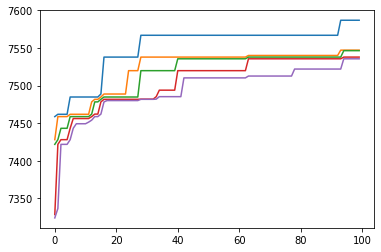

In [96]:
import matplotlib.pyplot as plt
import numpy as np
    
for i in range(len(y_plot_list)):
    plt.plot(x_plot_list, y_plot_list[i])

plt.show()

In [97]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 95241.99977517128 seconds ---


In [98]:


with open('malo_output-3', 'wb') as fp:
    pickle.dump(result, fp)
with open('malo_xplot-3', 'wb') as fp:
    pickle.dump(x_plot_list, fp)
with open('malo_yplot-3', 'wb') as fp:
    pickle.dump(y_plot_list, fp)

In [99]:
with open('malo_output-3', 'rb') as fp:
    read_result = pickle.load(fp)
    
print(read_result)

[[0, 2, Timestamp('2020-11-10 18:09:15+0000', tz='UTC'), Timestamp('2020-11-11 04:49:09+0000', tz='UTC'), 49, 0.171], [1, 5, Timestamp('2020-11-10 16:25:34+0000', tz='UTC'), Timestamp('2020-11-11 00:47:27+0000', tz='UTC'), 53, 0.128], [2, 6, Timestamp('2020-11-10 18:15:45+0000', tz='UTC'), Timestamp('2020-11-11 07:21:27+0000', tz='UTC'), 47, 0.133], [3, 13, Timestamp('2020-11-10 18:17:18+0000', tz='UTC'), Timestamp('2020-11-11 04:08:32+0000', tz='UTC'), 47, 0.133], [4, 18, Timestamp('2020-11-10 16:55:39+0000', tz='UTC'), Timestamp('2020-11-11 04:35:44+0000', tz='UTC'), 71, 0.171], [5, 25, Timestamp('2020-11-10 17:47:18+0000', tz='UTC'), Timestamp('2020-11-11 01:50:08+0000', tz='UTC'), 60, 0.133], [6, 1, Timestamp('2020-11-10 17:56:34+0000', tz='UTC'), Timestamp('2020-11-11 06:58:37+0000', tz='UTC'), 47, 0.14], [7, 20, Timestamp('2020-11-10 18:39:15+0000', tz='UTC'), Timestamp('2020-11-11 06:58:04+0000', tz='UTC'), 47, 0.171], [8, 10, Timestamp('2020-11-10 18:26:34+0000', tz='UTC'), Tim

In [100]:
with open('malo_yplot-3', 'rb') as fp:
    read_yplot = pickle.load(fp)
    
print(read_yplot)

[[7458.793156850696, 7461.881763401868, 7461.881763401868, 7461.881763401868, 7461.881763401868, 7484.865834229433, 7484.865834229433, 7484.865834229433, 7484.865834229433, 7484.865834229433, 7484.865834229433, 7484.865834229433, 7484.865834229433, 7484.865834229433, 7484.865834229433, 7488.835655068615, 7537.959343284052, 7537.959343284052, 7537.959343284052, 7537.959343284052, 7537.959343284052, 7537.959343284052, 7537.959343284052, 7537.959343284052, 7537.959343284052, 7537.959343284052, 7537.959343284052, 7537.959343284052, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.981086512783, 7566.98108